## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  58.295179   141.340524  0.369760  6.348929  0.682429
1  98.946578  1066.988356  0.442212  8.785213  1.354229
2  60.521762   720.270409  0.553093  8.682135  1.275102
3  82.564169  1591.214139  0.000746  2.446109 -0.114179
4  97.139301   753.020466  0.720125  8.216632  1.322340


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.46201 | train_mse: 6.29213 | train_mae: 1.72392 |  0:00:00s
epoch 1  | loss: 1.62312 | train_mse: 4.64296 | train_mae: 1.47358 |  0:00:00s


epoch 2  | loss: 1.19371 | train_mse: 3.83818 | train_mae: 1.33875 |  0:00:00s


epoch 3  | loss: 1.18447 | train_mse: 3.35496 | train_mae: 1.29145 |  0:00:01s


epoch 4  | loss: 1.16822 | train_mse: 2.88556 | train_mae: 1.21828 |  0:00:01s


epoch 5  | loss: 0.96653 | train_mse: 2.51929 | train_mae: 1.14694 |  0:00:02s


epoch 6  | loss: 1.06982 | train_mse: 2.19604 | train_mae: 1.07672 |  0:00:02s


epoch 7  | loss: 1.05942 | train_mse: 1.87282 | train_mae: 1.00693 |  0:00:02s


epoch 8  | loss: 1.01549 | train_mse: 1.67498 | train_mae: 0.95104 |  0:00:03s


epoch 9  | loss: 0.84845 | train_mse: 1.50281 | train_mae: 0.89488 |  0:00:03s


epoch 10 | loss: 0.90658 | train_mse: 1.35606 | train_mae: 0.84085 |  0:00:03s


epoch 11 | loss: 0.95409 | train_mse: 1.2697  | train_mae: 0.81018 |  0:00:04s


epoch 12 | loss: 0.85465 | train_mse: 1.21992 | train_mae: 0.78767 |  0:00:04s


epoch 13 | loss: 0.83187 | train_mse: 1.13105 | train_mae: 0.75756 |  0:00:04s


epoch 14 | loss: 0.9241  | train_mse: 1.07923 | train_mae: 0.73819 |  0:00:04s
epoch 15 | loss: 0.67901 | train_mse: 1.02788 | train_mae: 0.7194  |  0:00:04s


epoch 16 | loss: 0.94964 | train_mse: 0.99079 | train_mae: 0.7038  |  0:00:05s


epoch 17 | loss: 0.79516 | train_mse: 0.94677 | train_mae: 0.69027 |  0:00:05s


epoch 18 | loss: 0.7397  | train_mse: 0.90687 | train_mae: 0.67747 |  0:00:06s


epoch 19 | loss: 0.85139 | train_mse: 0.86493 | train_mae: 0.65661 |  0:00:06s


epoch 20 | loss: 0.67776 | train_mse: 0.83813 | train_mae: 0.64094 |  0:00:06s
epoch 21 | loss: 0.64462 | train_mse: 0.81249 | train_mae: 0.63517 |  0:00:06s


epoch 22 | loss: 0.55606 | train_mse: 0.7946  | train_mae: 0.63895 |  0:00:07s
epoch 23 | loss: 0.62919 | train_mse: 0.75333 | train_mae: 0.62359 |  0:00:07s


epoch 24 | loss: 0.70702 | train_mse: 0.71874 | train_mae: 0.61167 |  0:00:07s
epoch 25 | loss: 0.49623 | train_mse: 0.6848  | train_mae: 0.59792 |  0:00:07s
epoch 26 | loss: 0.59697 | train_mse: 0.65367 | train_mae: 0.58369 |  0:00:07s


epoch 27 | loss: 0.56249 | train_mse: 0.62405 | train_mae: 0.57153 |  0:00:07s


epoch 28 | loss: 0.52755 | train_mse: 0.60279 | train_mae: 0.56029 |  0:00:07s
epoch 29 | loss: 0.40154 | train_mse: 0.57735 | train_mae: 0.54649 |  0:00:07s


epoch 30 | loss: 0.80194 | train_mse: 0.56614 | train_mae: 0.53647 |  0:00:08s
epoch 31 | loss: 0.50265 | train_mse: 0.54765 | train_mae: 0.52803 |  0:00:08s


epoch 32 | loss: 0.60675 | train_mse: 0.52509 | train_mae: 0.51799 |  0:00:08s
epoch 33 | loss: 0.48181 | train_mse: 0.50071 | train_mae: 0.50606 |  0:00:08s


epoch 34 | loss: 0.80808 | train_mse: 0.4786  | train_mae: 0.49661 |  0:00:08s
epoch 35 | loss: 0.45373 | train_mse: 0.4646  | train_mae: 0.49069 |  0:00:08s


epoch 36 | loss: 0.45181 | train_mse: 0.45653 | train_mae: 0.48819 |  0:00:08s
epoch 37 | loss: 0.42883 | train_mse: 0.44817 | train_mae: 0.48386 |  0:00:09s


epoch 38 | loss: 0.49547 | train_mse: 0.43953 | train_mae: 0.47826 |  0:00:09s
epoch 39 | loss: 0.4658  | train_mse: 0.42677 | train_mae: 0.47395 |  0:00:09s


epoch 40 | loss: 0.4381  | train_mse: 0.4107  | train_mae: 0.46641 |  0:00:09s
epoch 41 | loss: 0.4403  | train_mse: 0.39542 | train_mae: 0.46035 |  0:00:09s
epoch 42 | loss: 0.54525 | train_mse: 0.38774 | train_mae: 0.45807 |  0:00:09s


epoch 43 | loss: 0.72522 | train_mse: 0.37658 | train_mae: 0.45138 |  0:00:09s
epoch 44 | loss: 0.52676 | train_mse: 0.36647 | train_mae: 0.44511 |  0:00:09s
epoch 45 | loss: 0.46205 | train_mse: 0.35648 | train_mae: 0.43824 |  0:00:10s


epoch 46 | loss: 0.34427 | train_mse: 0.34302 | train_mae: 0.42966 |  0:00:10s


epoch 47 | loss: 0.41057 | train_mse: 0.33286 | train_mae: 0.42289 |  0:00:10s
epoch 48 | loss: 0.35069 | train_mse: 0.32494 | train_mae: 0.4192  |  0:00:10s
epoch 49 | loss: 0.48991 | train_mse: 0.32256 | train_mae: 0.41657 |  0:00:10s


epoch 50 | loss: 0.40277 | train_mse: 0.32104 | train_mae: 0.41252 |  0:00:10s
epoch 51 | loss: 0.48884 | train_mse: 0.32639 | train_mae: 0.41168 |  0:00:10s
epoch 52 | loss: 0.57927 | train_mse: 0.32004 | train_mae: 0.40597 |  0:00:11s


epoch 53 | loss: 0.3561  | train_mse: 0.30387 | train_mae: 0.3956  |  0:00:11s


epoch 54 | loss: 0.3713  | train_mse: 0.28558 | train_mae: 0.38493 |  0:00:11s
epoch 55 | loss: 0.2967  | train_mse: 0.26879 | train_mae: 0.37349 |  0:00:11s


epoch 56 | loss: 0.26238 | train_mse: 0.26026 | train_mae: 0.36796 |  0:00:11s
epoch 57 | loss: 0.4057  | train_mse: 0.24906 | train_mae: 0.36144 |  0:00:11s


epoch 58 | loss: 0.2864  | train_mse: 0.24348 | train_mae: 0.35955 |  0:00:11s
epoch 59 | loss: 0.39433 | train_mse: 0.24276 | train_mae: 0.36062 |  0:00:11s


epoch 60 | loss: 0.38099 | train_mse: 0.23748 | train_mae: 0.35824 |  0:00:12s


epoch 61 | loss: 0.35928 | train_mse: 0.22691 | train_mae: 0.35024 |  0:00:12s
epoch 62 | loss: 0.3447  | train_mse: 0.21862 | train_mae: 0.3433  |  0:00:12s


epoch 63 | loss: 0.30092 | train_mse: 0.20991 | train_mae: 0.33652 |  0:00:12s
epoch 64 | loss: 0.48553 | train_mse: 0.2088  | train_mae: 0.33666 |  0:00:12s


epoch 65 | loss: 0.47428 | train_mse: 0.20805 | train_mae: 0.33573 |  0:00:13s
epoch 66 | loss: 0.38502 | train_mse: 0.20466 | train_mae: 0.33265 |  0:00:13s


epoch 67 | loss: 0.35001 | train_mse: 0.20658 | train_mae: 0.33286 |  0:00:13s
epoch 68 | loss: 0.25964 | train_mse: 0.20868 | train_mae: 0.33465 |  0:00:13s


epoch 69 | loss: 0.41932 | train_mse: 0.20769 | train_mae: 0.33072 |  0:00:13s
epoch 70 | loss: 0.42299 | train_mse: 0.2102  | train_mae: 0.32831 |  0:00:13s


epoch 71 | loss: 0.28995 | train_mse: 0.21358 | train_mae: 0.32867 |  0:00:13s
epoch 72 | loss: 0.22998 | train_mse: 0.20837 | train_mae: 0.32546 |  0:00:13s


epoch 73 | loss: 0.40392 | train_mse: 0.19805 | train_mae: 0.3191  |  0:00:14s
epoch 74 | loss: 0.28847 | train_mse: 0.18627 | train_mae: 0.30893 |  0:00:14s


epoch 75 | loss: 0.41755 | train_mse: 0.17528 | train_mae: 0.29708 |  0:00:14s
epoch 76 | loss: 0.40062 | train_mse: 0.1728  | train_mae: 0.29304 |  0:00:14s


epoch 77 | loss: 0.26562 | train_mse: 0.16886 | train_mae: 0.29011 |  0:00:14s
epoch 78 | loss: 0.28264 | train_mse: 0.16272 | train_mae: 0.28611 |  0:00:14s


epoch 79 | loss: 0.48506 | train_mse: 0.16218 | train_mae: 0.28669 |  0:00:14s
epoch 80 | loss: 0.28055 | train_mse: 0.16117 | train_mae: 0.2881  |  0:00:14s
epoch 81 | loss: 0.40249 | train_mse: 0.16344 | train_mae: 0.29365 |  0:00:15s


epoch 82 | loss: 0.19236 | train_mse: 0.16308 | train_mae: 0.29472 |  0:00:15s
epoch 83 | loss: 0.18487 | train_mse: 0.15911 | train_mae: 0.29243 |  0:00:15s


epoch 84 | loss: 0.43863 | train_mse: 0.15952 | train_mae: 0.29197 |  0:00:15s
epoch 85 | loss: 0.34685 | train_mse: 0.1555  | train_mae: 0.28861 |  0:00:15s
epoch 86 | loss: 0.25509 | train_mse: 0.15651 | train_mae: 0.28837 |  0:00:15s


epoch 87 | loss: 0.37509 | train_mse: 0.15765 | train_mae: 0.2893  |  0:00:15s


epoch 88 | loss: 0.30471 | train_mse: 0.16043 | train_mae: 0.29131 |  0:00:15s
epoch 89 | loss: 0.33701 | train_mse: 0.16402 | train_mae: 0.29259 |  0:00:16s


epoch 90 | loss: 0.21988 | train_mse: 0.16756 | train_mae: 0.29479 |  0:00:16s


epoch 91 | loss: 0.19944 | train_mse: 0.17425 | train_mae: 0.29903 |  0:00:16s
epoch 92 | loss: 0.38747 | train_mse: 0.18553 | train_mae: 0.30737 |  0:00:16s


epoch 93 | loss: 0.24231 | train_mse: 0.18123 | train_mae: 0.30451 |  0:00:16s
epoch 94 | loss: 0.31001 | train_mse: 0.17745 | train_mae: 0.30021 |  0:00:16s


epoch 95 | loss: 0.25292 | train_mse: 0.16944 | train_mae: 0.29462 |  0:00:17s
epoch 96 | loss: 0.2075  | train_mse: 0.16095 | train_mae: 0.28985 |  0:00:17s
epoch 97 | loss: 0.38937 | train_mse: 0.1558  | train_mae: 0.28294 |  0:00:17s


epoch 98 | loss: 0.26828 | train_mse: 0.15853 | train_mae: 0.28725 |  0:00:17s
epoch 99 | loss: 0.39997 | train_mse: 0.16222 | train_mae: 0.29187 |  0:00:17s
epoch 100| loss: 0.29155 | train_mse: 0.16265 | train_mae: 0.29212 |  0:00:17s


epoch 101| loss: 0.27698 | train_mse: 0.16389 | train_mae: 0.29084 |  0:00:17s
epoch 102| loss: 0.24594 | train_mse: 0.16314 | train_mae: 0.2883  |  0:00:17s
epoch 103| loss: 0.20746 | train_mse: 0.15741 | train_mae: 0.28331 |  0:00:17s


epoch 104| loss: 0.31413 | train_mse: 0.15361 | train_mae: 0.28025 |  0:00:17s
epoch 105| loss: 0.26939 | train_mse: 0.14937 | train_mae: 0.27484 |  0:00:17s
epoch 106| loss: 0.27    | train_mse: 0.14482 | train_mae: 0.27006 |  0:00:18s


epoch 107| loss: 0.34106 | train_mse: 0.14231 | train_mae: 0.27122 |  0:00:18s
epoch 108| loss: 0.1915  | train_mse: 0.14191 | train_mae: 0.26986 |  0:00:18s


epoch 109| loss: 0.18674 | train_mse: 0.14771 | train_mae: 0.27516 |  0:00:18s
epoch 110| loss: 0.17219 | train_mse: 0.14761 | train_mae: 0.27419 |  0:00:18s
epoch 111| loss: 0.17767 | train_mse: 0.15144 | train_mae: 0.27781 |  0:00:18s


epoch 112| loss: 0.26605 | train_mse: 0.15174 | train_mae: 0.27741 |  0:00:18s
epoch 113| loss: 0.19786 | train_mse: 0.14296 | train_mae: 0.27175 |  0:00:18s
epoch 114| loss: 0.22902 | train_mse: 0.13675 | train_mae: 0.26806 |  0:00:18s


epoch 115| loss: 0.2438  | train_mse: 0.13246 | train_mae: 0.26374 |  0:00:18s
epoch 116| loss: 0.37255 | train_mse: 0.13075 | train_mae: 0.26497 |  0:00:19s
epoch 117| loss: 0.37563 | train_mse: 0.13219 | train_mae: 0.26601 |  0:00:19s


epoch 118| loss: 0.17934 | train_mse: 0.13793 | train_mae: 0.27351 |  0:00:19s
epoch 119| loss: 0.27612 | train_mse: 0.14514 | train_mae: 0.27898 |  0:00:19s


epoch 120| loss: 0.1486  | train_mse: 0.14772 | train_mae: 0.28113 |  0:00:19s
epoch 121| loss: 0.23267 | train_mse: 0.14808 | train_mae: 0.27946 |  0:00:19s
epoch 122| loss: 0.17622 | train_mse: 0.14655 | train_mae: 0.27659 |  0:00:19s


epoch 123| loss: 0.13924 | train_mse: 0.14307 | train_mae: 0.27111 |  0:00:19s
epoch 124| loss: 0.19611 | train_mse: 0.14003 | train_mae: 0.2656  |  0:00:19s
epoch 125| loss: 0.28947 | train_mse: 0.13461 | train_mae: 0.25916 |  0:00:19s


epoch 126| loss: 0.2132  | train_mse: 0.12735 | train_mae: 0.24702 |  0:00:20s
epoch 127| loss: 0.29353 | train_mse: 0.12428 | train_mae: 0.24364 |  0:00:20s


epoch 128| loss: 0.38625 | train_mse: 0.12135 | train_mae: 0.24042 |  0:00:20s
epoch 129| loss: 0.21227 | train_mse: 0.12181 | train_mae: 0.23966 |  0:00:20s


epoch 130| loss: 0.42442 | train_mse: 0.12439 | train_mae: 0.24119 |  0:00:20s
epoch 131| loss: 0.32734 | train_mse: 0.12756 | train_mae: 0.24147 |  0:00:20s
epoch 132| loss: 0.23898 | train_mse: 0.12971 | train_mae: 0.24258 |  0:00:20s


epoch 133| loss: 0.24034 | train_mse: 0.13044 | train_mae: 0.24589 |  0:00:20s
epoch 134| loss: 0.18253 | train_mse: 0.12419 | train_mae: 0.2448  |  0:00:20s


epoch 135| loss: 0.18067 | train_mse: 0.12218 | train_mae: 0.24491 |  0:00:21s
epoch 136| loss: 0.23313 | train_mse: 0.12473 | train_mae: 0.24727 |  0:00:21s


epoch 137| loss: 0.22093 | train_mse: 0.13178 | train_mae: 0.24962 |  0:00:21s
epoch 138| loss: 0.31452 | train_mse: 0.13582 | train_mae: 0.25131 |  0:00:21s


epoch 139| loss: 0.19535 | train_mse: 0.13538 | train_mae: 0.25159 |  0:00:21s
epoch 140| loss: 0.16449 | train_mse: 0.13068 | train_mae: 0.24846 |  0:00:21s


epoch 141| loss: 0.41081 | train_mse: 0.12851 | train_mae: 0.24904 |  0:00:22s
epoch 142| loss: 0.2961  | train_mse: 0.12123 | train_mae: 0.24688 |  0:00:22s


epoch 143| loss: 0.34669 | train_mse: 0.11808 | train_mae: 0.24481 |  0:00:22s
epoch 144| loss: 0.16974 | train_mse: 0.11727 | train_mae: 0.24005 |  0:00:22s


epoch 145| loss: 0.20665 | train_mse: 0.11629 | train_mae: 0.23366 |  0:00:22s


epoch 146| loss: 0.37544 | train_mse: 0.11447 | train_mae: 0.23176 |  0:00:22s
epoch 147| loss: 0.33905 | train_mse: 0.11901 | train_mae: 0.23401 |  0:00:23s


epoch 148| loss: 0.1826  | train_mse: 0.11948 | train_mae: 0.23475 |  0:00:23s
epoch 149| loss: 0.21136 | train_mse: 0.11537 | train_mae: 0.23489 |  0:00:23s


epoch 150| loss: 0.16146 | train_mse: 0.11204 | train_mae: 0.23458 |  0:00:23s


epoch 151| loss: 0.3663  | train_mse: 0.10939 | train_mae: 0.23344 |  0:00:23s
epoch 152| loss: 0.20351 | train_mse: 0.10441 | train_mae: 0.23034 |  0:00:23s


epoch 153| loss: 0.25158 | train_mse: 0.0972  | train_mae: 0.22616 |  0:00:23s
epoch 154| loss: 0.40126 | train_mse: 0.09148 | train_mae: 0.2205  |  0:00:24s


epoch 155| loss: 0.15459 | train_mse: 0.0896  | train_mae: 0.21753 |  0:00:24s
epoch 156| loss: 0.20329 | train_mse: 0.08853 | train_mae: 0.21704 |  0:00:24s


epoch 157| loss: 0.16861 | train_mse: 0.09274 | train_mae: 0.22172 |  0:00:24s
epoch 158| loss: 0.29721 | train_mse: 0.09872 | train_mae: 0.22778 |  0:00:24s
epoch 159| loss: 0.24638 | train_mse: 0.1025  | train_mae: 0.23184 |  0:00:24s


epoch 160| loss: 0.18292 | train_mse: 0.11139 | train_mae: 0.23799 |  0:00:24s
epoch 161| loss: 0.16407 | train_mse: 0.11261 | train_mae: 0.23957 |  0:00:24s
epoch 162| loss: 0.21821 | train_mse: 0.11439 | train_mae: 0.24101 |  0:00:24s


epoch 163| loss: 0.1225  | train_mse: 0.11975 | train_mae: 0.24687 |  0:00:25s
epoch 164| loss: 0.30649 | train_mse: 0.11931 | train_mae: 0.24772 |  0:00:25s
epoch 165| loss: 0.27533 | train_mse: 0.11843 | train_mae: 0.2493  |  0:00:25s


epoch 166| loss: 0.27575 | train_mse: 0.11191 | train_mae: 0.24438 |  0:00:25s
epoch 167| loss: 0.29846 | train_mse: 0.11007 | train_mae: 0.24249 |  0:00:25s
epoch 168| loss: 0.24164 | train_mse: 0.11194 | train_mae: 0.24214 |  0:00:25s


epoch 169| loss: 0.27917 | train_mse: 0.11012 | train_mae: 0.24099 |  0:00:25s


epoch 170| loss: 0.28225 | train_mse: 0.10961 | train_mae: 0.24079 |  0:00:25s
epoch 171| loss: 0.32327 | train_mse: 0.10808 | train_mae: 0.2384  |  0:00:25s


epoch 172| loss: 0.19362 | train_mse: 0.1073  | train_mae: 0.2371  |  0:00:26s
epoch 173| loss: 0.26925 | train_mse: 0.10819 | train_mae: 0.23699 |  0:00:26s


epoch 174| loss: 0.22331 | train_mse: 0.10441 | train_mae: 0.23255 |  0:00:26s
epoch 175| loss: 0.25164 | train_mse: 0.09967 | train_mae: 0.2294  |  0:00:26s


epoch 176| loss: 0.20798 | train_mse: 0.09297 | train_mae: 0.22203 |  0:00:26s
epoch 177| loss: 0.22923 | train_mse: 0.09085 | train_mae: 0.21916 |  0:00:26s


epoch 178| loss: 0.19545 | train_mse: 0.08506 | train_mae: 0.21603 |  0:00:26s
epoch 179| loss: 0.21969 | train_mse: 0.07977 | train_mae: 0.21325 |  0:00:26s
epoch 180| loss: 0.35168 | train_mse: 0.07811 | train_mae: 0.21389 |  0:00:27s


epoch 181| loss: 0.25493 | train_mse: 0.07986 | train_mae: 0.21547 |  0:00:27s
epoch 182| loss: 0.212   | train_mse: 0.08161 | train_mae: 0.21581 |  0:00:27s
epoch 183| loss: 0.22709 | train_mse: 0.08273 | train_mae: 0.21863 |  0:00:27s


epoch 184| loss: 0.1867  | train_mse: 0.0833  | train_mae: 0.21674 |  0:00:27s
epoch 185| loss: 0.44146 | train_mse: 0.08154 | train_mae: 0.21633 |  0:00:27s
epoch 186| loss: 0.14067 | train_mse: 0.08161 | train_mae: 0.21745 |  0:00:27s


epoch 187| loss: 0.16679 | train_mse: 0.0782  | train_mae: 0.21377 |  0:00:27s
epoch 188| loss: 0.12934 | train_mse: 0.07686 | train_mae: 0.21189 |  0:00:27s
epoch 189| loss: 0.30024 | train_mse: 0.08055 | train_mae: 0.21568 |  0:00:27s


epoch 190| loss: 0.30662 | train_mse: 0.08478 | train_mae: 0.21912 |  0:00:27s
epoch 191| loss: 0.20852 | train_mse: 0.08722 | train_mae: 0.22043 |  0:00:28s
epoch 192| loss: 0.14331 | train_mse: 0.08315 | train_mae: 0.2143  |  0:00:28s


epoch 193| loss: 0.17517 | train_mse: 0.07829 | train_mae: 0.207   |  0:00:28s
epoch 194| loss: 0.17827 | train_mse: 0.07008 | train_mae: 0.19767 |  0:00:28s


epoch 195| loss: 0.33209 | train_mse: 0.06678 | train_mae: 0.1945  |  0:00:28s
epoch 196| loss: 0.19358 | train_mse: 0.06603 | train_mae: 0.19386 |  0:00:28s
epoch 197| loss: 0.36741 | train_mse: 0.06613 | train_mae: 0.1934  |  0:00:28s


epoch 198| loss: 0.19778 | train_mse: 0.06473 | train_mae: 0.19028 |  0:00:28s
epoch 199| loss: 0.22405 | train_mse: 0.06304 | train_mae: 0.19099 |  0:00:28s
epoch 200| loss: 0.21669 | train_mse: 0.065   | train_mae: 0.19293 |  0:00:28s


epoch 201| loss: 0.1824  | train_mse: 0.06447 | train_mae: 0.19174 |  0:00:28s
epoch 202| loss: 0.43801 | train_mse: 0.06869 | train_mae: 0.19961 |  0:00:29s
epoch 203| loss: 0.31706 | train_mse: 0.07793 | train_mae: 0.20727 |  0:00:29s


epoch 204| loss: 0.16645 | train_mse: 0.07993 | train_mae: 0.20872 |  0:00:29s
epoch 205| loss: 0.34239 | train_mse: 0.07906 | train_mae: 0.2068  |  0:00:29s


epoch 206| loss: 0.16759 | train_mse: 0.08226 | train_mae: 0.2123  |  0:00:29s
epoch 207| loss: 0.19697 | train_mse: 0.08008 | train_mae: 0.21272 |  0:00:29s
epoch 208| loss: 0.1693  | train_mse: 0.07708 | train_mae: 0.20952 |  0:00:29s


epoch 209| loss: 0.30452 | train_mse: 0.07631 | train_mae: 0.20936 |  0:00:29s
epoch 210| loss: 0.17682 | train_mse: 0.07772 | train_mae: 0.21118 |  0:00:29s
epoch 211| loss: 0.19761 | train_mse: 0.07958 | train_mae: 0.21369 |  0:00:29s


epoch 212| loss: 0.16965 | train_mse: 0.08093 | train_mae: 0.21471 |  0:00:29s
epoch 213| loss: 0.18523 | train_mse: 0.078   | train_mae: 0.21022 |  0:00:30s
epoch 214| loss: 0.20649 | train_mse: 0.07994 | train_mae: 0.2106  |  0:00:30s


epoch 215| loss: 0.13806 | train_mse: 0.08526 | train_mae: 0.21681 |  0:00:30s
epoch 216| loss: 0.13474 | train_mse: 0.09009 | train_mae: 0.22116 |  0:00:30s


epoch 217| loss: 0.25932 | train_mse: 0.08926 | train_mae: 0.21869 |  0:00:30s
epoch 218| loss: 0.18403 | train_mse: 0.09654 | train_mae: 0.22348 |  0:00:30s
epoch 219| loss: 0.22339 | train_mse: 0.10065 | train_mae: 0.22664 |  0:00:30s


epoch 220| loss: 0.22473 | train_mse: 0.10224 | train_mae: 0.22827 |  0:00:30s
epoch 221| loss: 0.34848 | train_mse: 0.10012 | train_mae: 0.22599 |  0:00:30s


epoch 222| loss: 0.22123 | train_mse: 0.10079 | train_mae: 0.22696 |  0:00:31s
epoch 223| loss: 0.15116 | train_mse: 0.09867 | train_mae: 0.22396 |  0:00:31s


epoch 224| loss: 0.33093 | train_mse: 0.1024  | train_mae: 0.22708 |  0:00:31s
epoch 225| loss: 0.16371 | train_mse: 0.09806 | train_mae: 0.22328 |  0:00:31s


epoch 226| loss: 0.16552 | train_mse: 0.09943 | train_mae: 0.22429 |  0:00:31s
epoch 227| loss: 0.20657 | train_mse: 0.09554 | train_mae: 0.22156 |  0:00:31s


epoch 228| loss: 0.2792  | train_mse: 0.09645 | train_mae: 0.21841 |  0:00:31s
epoch 229| loss: 0.39374 | train_mse: 0.10315 | train_mae: 0.22287 |  0:00:32s


epoch 230| loss: 0.23996 | train_mse: 0.09698 | train_mae: 0.22092 |  0:00:32s
epoch 231| loss: 0.25676 | train_mse: 0.0874  | train_mae: 0.21664 |  0:00:32s


epoch 232| loss: 0.16354 | train_mse: 0.06939 | train_mae: 0.2     |  0:00:32s


epoch 233| loss: 0.21955 | train_mse: 0.07133 | train_mae: 0.20584 |  0:00:32s
epoch 234| loss: 0.13783 | train_mse: 0.07292 | train_mae: 0.20912 |  0:00:33s


epoch 235| loss: 0.13604 | train_mse: 0.07519 | train_mae: 0.21143 |  0:00:33s


epoch 236| loss: 0.12431 | train_mse: 0.07517 | train_mae: 0.21229 |  0:00:33s
epoch 237| loss: 0.22914 | train_mse: 0.07642 | train_mae: 0.21289 |  0:00:33s


epoch 238| loss: 0.14379 | train_mse: 0.07533 | train_mae: 0.20991 |  0:00:34s
epoch 239| loss: 0.23594 | train_mse: 0.07466 | train_mae: 0.20522 |  0:00:34s


epoch 240| loss: 0.1451  | train_mse: 0.07619 | train_mae: 0.20498 |  0:00:34s
epoch 241| loss: 0.26165 | train_mse: 0.07699 | train_mae: 0.20575 |  0:00:34s


epoch 242| loss: 0.25359 | train_mse: 0.07586 | train_mae: 0.2055  |  0:00:34s
epoch 243| loss: 0.23466 | train_mse: 0.07867 | train_mae: 0.20997 |  0:00:34s


epoch 244| loss: 0.17374 | train_mse: 0.08481 | train_mae: 0.21648 |  0:00:34s
epoch 245| loss: 0.14499 | train_mse: 0.10606 | train_mae: 0.2262  |  0:00:35s


epoch 246| loss: 0.23261 | train_mse: 0.11281 | train_mae: 0.22645 |  0:00:35s
epoch 247| loss: 0.23527 | train_mse: 0.0969  | train_mae: 0.22132 |  0:00:35s


epoch 248| loss: 0.18595 | train_mse: 0.08355 | train_mae: 0.21527 |  0:00:35s

Early stopping occurred at epoch 248 with best_epoch = 198 and best_train_mae = 0.19028
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3695081475913037


ABC Pre-generator MAE 0.9528766908690909


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

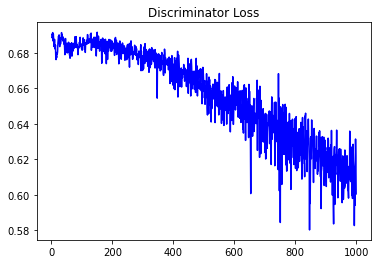

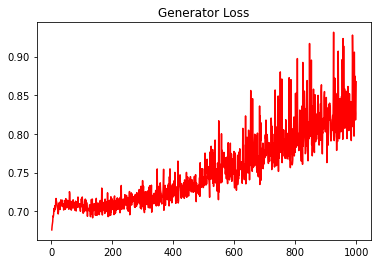

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5890924715530127


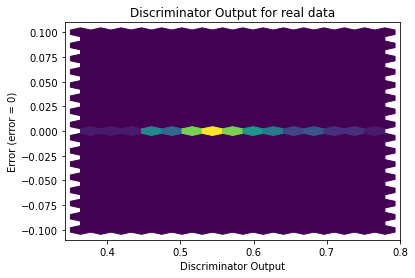

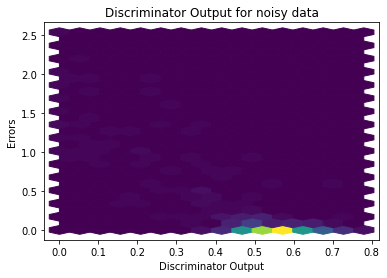

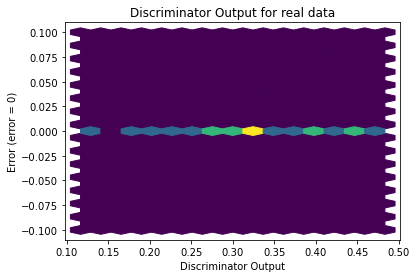

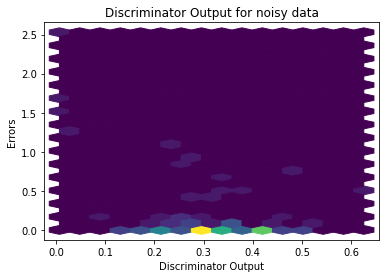

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


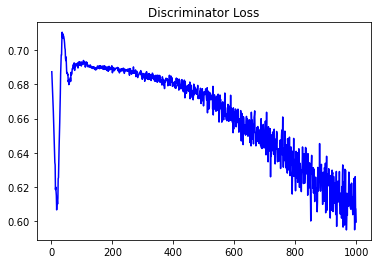

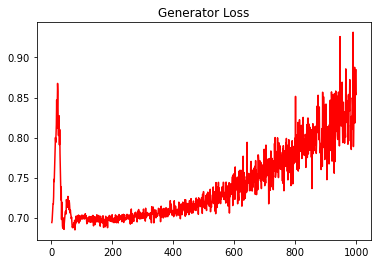

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4919940074980259


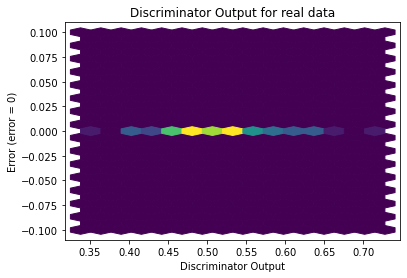

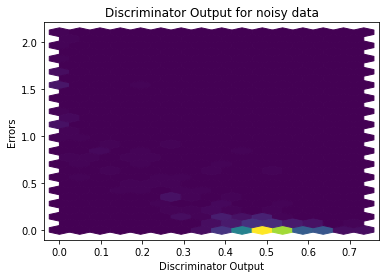

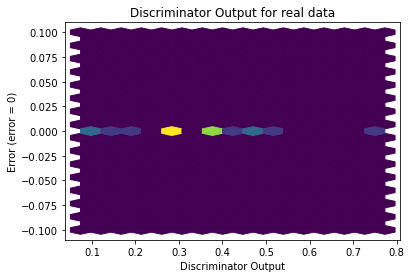

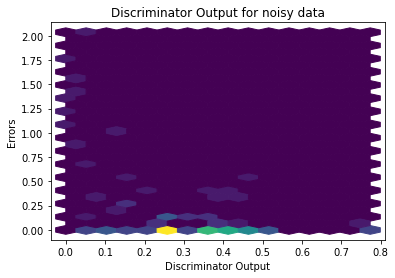

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1920]], requires_grad=True)
